In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [3]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [4]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [5]:
len(df_0)

15000

In [6]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1336,0.237142,944.933951
2741,0.123943,318.864022
2837,0.196791,691.477740
7529,0.101057,226.553750
10568,0.066420,112.202062


In [7]:
df_0 = df_0[(df_0['epsilon'] == .06641994156659121) & (df_0['n_zero_square'] == 112.2020615473713)]
len(df_0)

2500

In [8]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
10568,14248,0.06642,112.202062,38,53.883128,"[54.271, 60.982, 72.552, 181.137, 260.025, 272...","[54.271, 6.7109999999999985, 11.57000000000000...",1299848,700152
10569,14251,0.06642,112.202062,49,41.016420,"[81.423, 137.174, 220.87, 237.193, 310.422, 34...","[81.423, 55.751000000000005, 83.696, 16.323000...",1104087,895913
10570,14254,0.06642,112.202062,52,38.888660,"[44.993, 81.57600000000001, 168.02100000000002...","[44.993, 36.583000000000006, 86.44500000000001...",886028,1113972
10571,14257,0.06642,112.202062,52,38.020679,"[6.359, 16.002, 57.839, 98.702, 194.761, 206.6...","[6.359, 9.642999999999999, 41.837, 40.863, 96....",1115433,884567
10572,14259,0.06642,112.202062,53,38.939759,"[35.953, 100.016, 117.09100000000001, 159.1520...","[35.953, 64.063, 17.075000000000003, 42.061000...",1001157,998843


In [9]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [10]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0[(df_0['any_less_than_5'] == False)]
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
10568,14248,0.06642,112.202062,38,51.282308,"[54.271, 60.982, 72.552, 181.137, 260.025, 272...","[54.27, 6.71, 11.57, 108.58, 78.89, 12.48, 27....",1299848,700152,49.962368,False
10651,14252,0.06642,112.202062,48,40.815918,"[18.453, 66.734, 138.254, 211.244, 243.633, 27...","[18.45, 48.28, 71.52, 72.99, 32.39, 33.55, 60....",917027,1082973,41.164167,False
10653,14258,0.06642,112.202062,36,54.054595,"[173.589, 223.568, 240.109, 355.105, 400.838, ...","[173.59, 49.98, 16.54, 115.0, 45.73, 152.65, 2...",975320,1024680,54.621111,False
12517,12507,0.06642,112.202062,50,39.215490,"[86.665, 128.825, 225.78900000000002, 234.207,...","[86.67, 42.16, 96.96, 8.42, 13.93, 115.7, 92.3...",1064763,935237,39.857200,False
12523,12791,0.06642,112.202062,35,55.555278,"[46.457, 54.079, 165.465, 298.188, 398.331, 40...","[46.46, 7.62, 111.39, 132.72, 100.14, 8.68, 15...",812325,1187675,56.307143,False


In [11]:
len(df_0_cleaned)

338

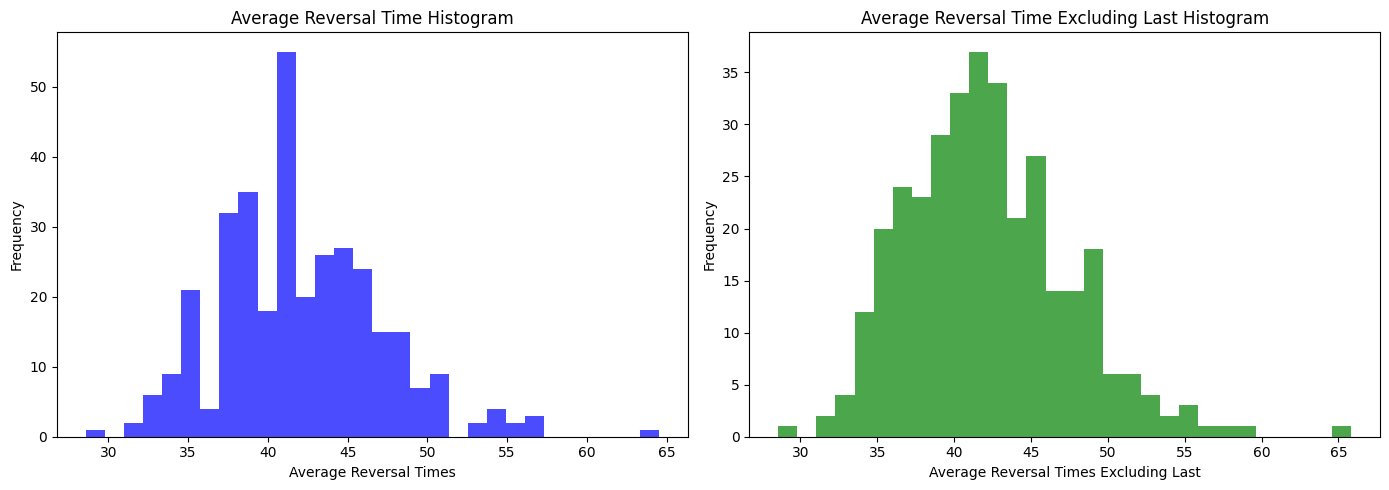

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_0_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_0_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

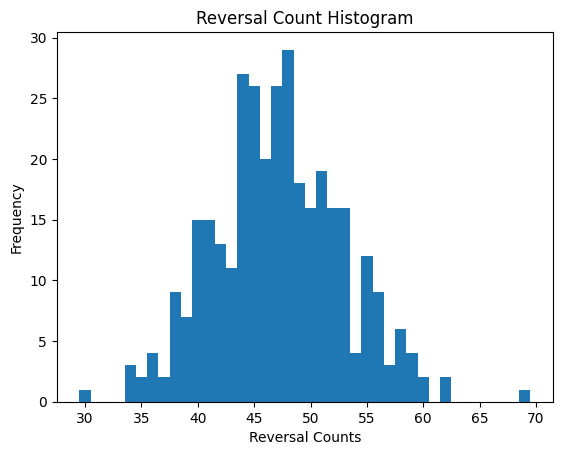

In [13]:
bin_edges = np.arange(start=df_0_cleaned['reversal_count'].min() - .5,
                      stop= df_0_cleaned['reversal_count'].max() + 1.5)
df_0_cleaned['reversal_count'].plot(kind = 'hist', bins = bin_edges, align = 'mid')
plt.title('Reversal Count Histogram')
plt.xlabel('Reversal Counts')
plt.show()